# Support Vector Regression (SVR)

Class notes:
* In SVR, we need to apply features scaling
because in this model their is not this explicit
equation of the dependant variables with respect
to the features and mostly their is not those
coefficient multiplying each of the features and
therefore not compensating with lower values for
the features taking high values.
* Support Vector Regression model has an implicit
equation of the dependant variables with respect
to the features so we don't have such coefficient
like simple linear regression.

## Importing the libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

## Importing the dataset

In [34]:
dataset = pd.read_csv('Position_Salaries.csv')

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [35]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [36]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [37]:
y = y.reshape(len(y), 1)

## Feature Scaling

In [38]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [39]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [40]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

Class notes:
* For non-linear regression, you have to choose a kernel.
* For further information about kernel, you can take a
look at: https://data-flair.training/blogs/svm-kernel-functions/

In [41]:
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

d:\__outils\__venv\udemy_venv\ml_a_to_z\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [42]:
prediction = regressor.predict(sc_X.transform([[6.5]]))

In [43]:
print(sc_y.inverse_transform(prediction))

[170370.0204065]


## Visualising SVR results

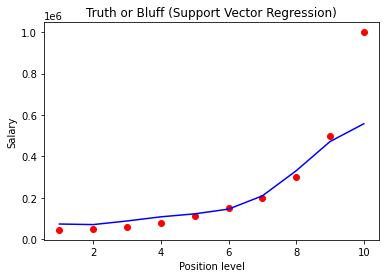

In [46]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color='blue')
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising SVR results (for higher resolution and smoother curve)

Class notes:
* SVR struggle to catch borderline values or distanced values.

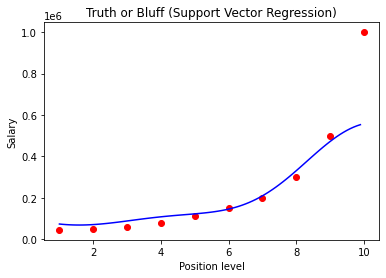

In [51]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color='blue')
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
